In [ ]:
#Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read Raw Dataset
df = pd.read_excel('/content/raw_data.xlsx')

In [ ]:
df.head()

In [ ]:
# Fill all NaN with the values above
data = df.fillna(method='ffill')

In [ ]:
data.head()

In [ ]:
# Process Disease and Symptom Names
def process_data(data):
    data_list = []
    data_name = data.replace('^','_').split('_') #separates UMLS from the disease
    n = 1
    for names in data_name:
        if (n % 2 == 0):
            data_list.append(names)
        n += 1
    return data_list

In [ ]:
# Data Cleanup
disease_list = []
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
count = 0

for idx, row in data.iterrows():
    
    # Get the Disease Names
    if (row['Disease'] !="\xc2\xa0") and (row['Disease'] != ""):
        disease = row['Disease']
        disease_list = process_data(data=disease)
        count = row['Count of Disease Occurrence']

    # Get the Symptoms Corresponding to Diseases
    if (row['Symptom'] !="\xc2\xa0") and (row['Symptom'] != ""):
        symptom = row['Symptom']
        symptom_list = process_data(data=symptom)
        for d in disease_list:
            for s in symptom_list:
                disease_symptom_dict[d].append(s)
            disease_symptom_count[d] = count

In [ ]:
# See that the data is Processed Correctly
disease_symptom_dict

In [ ]:
# Count of Disease Occurence w.r.t each Disease
disease_symptom_count

In [ ]:
# Save cleaned data as CSV
f = open('/cleaned_data.csv', 'w')

with f:
    writer = csv.writer(f)
    for key, val in disease_symptom_dict.items():
        for i in range(len(val)):
            writer.writerow([key, val[i], disease_symptom_count[key]])

In [ ]:
# Read Cleaned Data as DF
df = pd.read_csv('/cleaned_data.csv')
df.columns = ['disease', 'symptom', 'occurence_count']
df.head()

,disease,symptom,occurence_count
0,hypertensive disease,shortness of breath,3363.0
1,hypertensive disease,dizziness,3363.0
2,hypertensive disease,asthenia,3363.0
3,hypertensive disease,fall,3363.0
4,hypertensive disease,syncope,3363.0


In [ ]:
# Remove any rows with empty values
df.replace(float('nan'), np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
from sklearn import preprocessing

In [ ]:
n_unique = len(df['symptom'].unique())
n_unique

404

In [ ]:
df.dtypes

disease             object
symptom             object
occurence_count    float64
dtype: object

In [ ]:
# Encode the Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['symptom'])
print(integer_encoded)

[328  87  28 ... 361 130 122]


In [ ]:
# One Hot Encode the Labels
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".


In [ ]:
print(integer_encoded)

[[328]
 [ 87]
 [ 28]
 ...
 [361]
 [130]
 [122]]


In [ ]:
len(onehot_encoded[0])

404

In [ ]:
cols = np.asarray(df['symptom'].unique())
cols

In [ ]:
# Create a new dataframe to save OHE labels
df_ohe = pd.DataFrame(columns = cols)
df_ohe.head()

,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,nausea,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts


In [ ]:
for i in range(len(onehot_encoded)):
    df_ohe.loc[i] = onehot_encoded[i]

In [ ]:
df_ohe.head()

In [ ]:
len(df_ohe)

2126

In [ ]:
# Disease Dataframe
df_disease = df['disease']
df_disease.head()

0    hypertensive disease
1    hypertensive disease
2    hypertensive disease
3    hypertensive disease
4    hypertensive disease
Name: disease, dtype: object

In [ ]:
# Concatenate OHE Labels with the Disease Column
df_concat = pd.concat([df_disease,df_ohe], axis=1)
df_concat.head()

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_concat.drop_duplicates(keep='first',inplace=True)

In [ ]:
df_concat.head()

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(df_concat)

2097

In [ ]:
cols = df_concat.columns
cols

In [ ]:
cols = cols[1:]

In [ ]:
# Since, every disease has multiple symptoms, combine all symptoms per disease per row
df_concat = df_concat.groupby('disease').sum()
df_concat = df_concat.reset_index()
df_concat[:5]

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,Alzheimer's disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,HIV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pneumocystis carinii pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,accident cerebrovascular,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,acquired immuno-deficiency syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(df_concat)

149

In [ ]:
df_concat.to_csv("/training_data.csv", index=False)

In [ ]:
# One Hot Encoded Features
X = df_concat[cols]

# Labels
y = df_concat['disease']

## Model Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
len(X_train), len(y_train)

(119, 119)

In [ ]:
len(X_test), len(y_test)

(30, 30)

In [ ]:
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X,y)

In [ ]:
clf_dt.score(X,y)

0.9731543624161074

In [ ]:
# save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(clf_dt, open('/content/models', 'wb'))

model_save_name = 'classifier.sav'
#path = F"/content/models/{model_save_name}" 
pickle.dump(clf_dt, open(F'/content/models/{model_save_name}', 'wb'))

In [ ]:
import pickle

In [ ]:
from sklearn import metrics
y_pred = clf_dt.predict(X_test)
#print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9666666666666667


In [ ]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

                            HIV       1.00      1.00      1.00         1
               bipolar disorder       1.00      1.00      1.00         1
                     cellulitis       1.00      1.00      1.00         1
                      cirrhosis       1.00      1.00      1.00         1
                        colitis       1.00      1.00      1.00         1
                      confusion       1.00      1.00      1.00         1
                       delirium       1.00      1.00      1.00         1
                       delusion       1.00      1.00      1.00         1
                       dementia       1.00      1.00      1.00         1
                   endocarditis       1.00      1.00      1.00         1
gastroesophageal reflux disease       1.00      1.00      1.00         1
                       glaucoma       1.00      1.00      1.00         1
                    hemiparesis       1.00      1.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_pred = clf_dt.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# calc confusion matrix
y_test_predict = clf_dt.predict(X)
print("Confusion Matrix Tree : \n", confusion_matrix(y, y_test_predict),"\n")
print("The precision for Tree is ",precision_score(y_test, y_pred,average='micro')) 
print("The recall for Tree is ",recall_score(y_test, y_pred, average='micro'),"\n")

Confusion Matrix Tree : 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]] 

The precision for Tree is  0.9666666666666667
The recall for Tree is  0.9666666666666667 



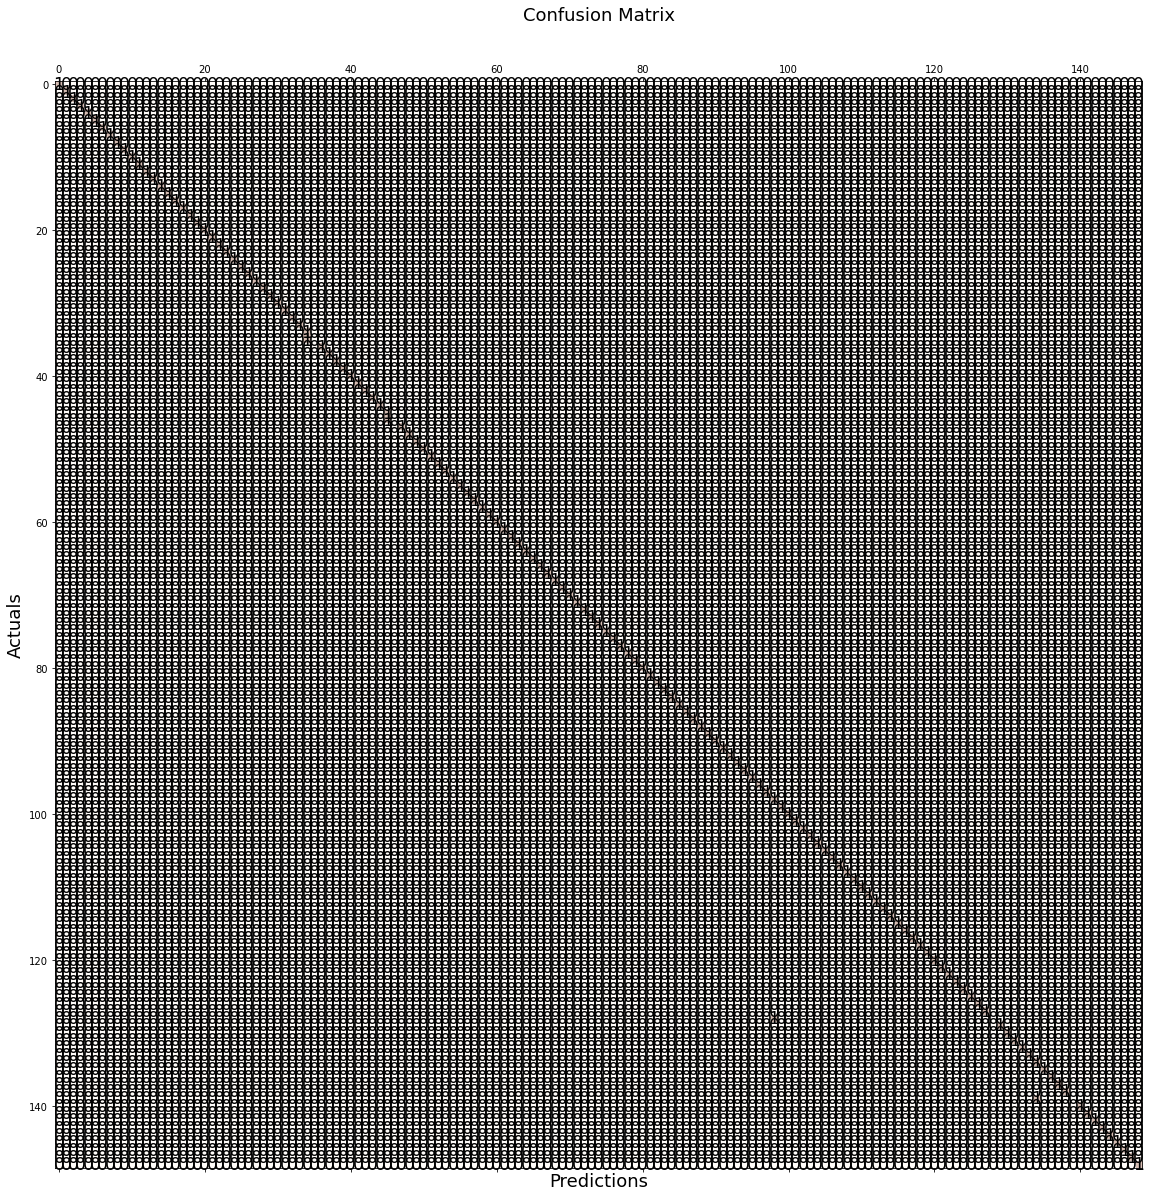

In [ ]:
conf_matrix = confusion_matrix(y, y_test_predict)
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

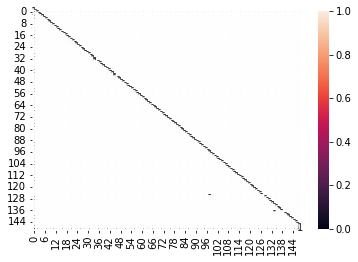

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [ ]:
print(y, y_test_predict)

0                      Alzheimer's disease
1                                      HIV
2           Pneumocystis carinii pneumonia
3                 accident cerebrovascular
4      acquired immuno-deficiency syndrome
                      ...                 
144                  tonic-clonic seizures
145              transient ischemic attack
146          tricuspid valve insufficiency
147                           ulcer peptic
148            upper respiratory infection
Name: disease, Length: 149, dtype: object ["Alzheimer's disease" 'HIV' 'Pneumocystis\xa0carinii\xa0pneumonia'
 'accident\xa0cerebrovascular' 'acquired\xa0immuno-deficiency syndrome'
 'adenocarcinoma' 'adhesion' 'affect labile' 'anemia' 'anxiety state'
 'aphasia' 'arthritis' 'asthma' 'bacteremia'
 'benign prostatic hypertrophy' 'biliary calculus' 'bipolar disorder'
 'bronchitis' 'candidiasis' 'carcinoma' 'carcinoma breast'
 'carcinoma colon' 'carcinoma of lung' 'carcinoma prostate'
 'cardiomyopathy' 'cellulitis' 'cholecyst

In [ ]:
export_graphviz(dt, 
                out_file='./tree.dot', 
                feature_names=cols)

In [ ]:
!pip install graphviz

In [ ]:
from graphviz import Source
from sklearn import tree

graph = Source(export_graphviz(dt, 
                out_file=None, 
                feature_names=cols))

png_bytes = graph.pipe(format='png')

with open('tree.png','wb') as f:
    f.write(png_bytes)

In [ ]:
from IPython.display import Image
Image(png_bytes)

In [ ]:
disease_pred = clf_dt.predict(X)

In [ ]:
print(len(y.values))

149


In [ ]:
disease_real = y.values

In [ ]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: coronary arteriosclerosis
Actual: coronary heart disease

Pred: depression mental
Actual: depressive disorder

Pred: malignant neoplasms
Actual: primary malignant neoplasm

Pred: septicemia
Actual: systemic infection



In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
# #cv = RepeatedStratifiedKFold(n_splits=1, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X, onehot_encoded)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [ ]:
rf.score(X, onehot_encoded)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in sc

0.8346870914703985

In [ ]:
y_test_predict = rf.predict(X_test)
model_save_name = 'randomForest.sav'
#path = F"/content/models/{model_save_name}" 
pickle.dump(clf_dt, open(F'/content/models/{model_save_name}', 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [ ]:
conf2_matrix = confusion_matrix(y, y_test_predict)
sns.heatmap(conf2_matrix, annot=True)

# conf_matrix2 = confusion_matrix(y, y_test_predict)
# fig, ax = plt.subplots(figsize=(20, 20))
# ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
# plt.xlabel('Predictions', fontsize=18)
# plt.ylabel('Actuals', fontsize=18)
# plt.title('Confusion Matrix', fontsize=18)
# plt.show()

In [ ]:
import joblib

In [ ]:
classi = joblib.load(r'/content/classifier.sav')

In [ ]:
import numpy as np
symp=np.array([1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
symp.reshape(1, -1)
classi.predict(symp)

In [ ]:
import pandas as pd
from sklearn import preprocessing

df_train = pd.read_csv('/content/training_data.csv', delimiter=',')
df_test = pd.read_csv('/content/test_data.csv', delimiter=',')
vocab = df_train.columns.tolist()[:-1]

label = preprocessing.LabelEncoder()
label.fit(pd.concat([df_train['prognosis'], df_test['prognosis']]))
labels = label.fit_transform(df_train['prognosis'])

le_name_mapping = dict(zip(label.classes_, label.transform(label.classes_)))


def predictor(final_symptoms):
  y_test = np.zeros(132)
  for final_symptom in final_symptoms:
      y_test[vocab.index(final_symptom)] = 1
      
  y_test_in = pd.DataFrame(y_test, vocab).T
  #y_pred = model.predict(y_test_in)
  
  ######
  p = model.predict_log_proba(y_test_in)
  n = 5 #Top n results
  top_n = np.argsort(p)[:,:-n-1:-1] # Output Labels
  y_pred = np.sort(p)[:,:-n-1:-1]
  ######
  diseases = []
  for disease, code in le_name_mapping.items():
    for top in top_n[0]:
      if code == top:
        diseases.append(disease)
  
  return diseases

In [ ]:
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')
import difflib
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#from preprocess import word_extractor, symptoms
import pandas as pd
import numpy as np

def word_extractor(sentence):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens =tokenizer.tokenize(sentence)
    tokens=[token.lower() for token in tokens]
    tokens = [token for token in tokens if not token in stopwords.words()]
    return tokens

def symptoms(symptoms):
    final_symptoms = []
    final_symptoms_flat = []
    df_train = pd.read_csv('/content/training_data.csv', delimiter=',')
    vocab = df_train.columns.tolist()

    for symptom in symptoms:
        final_symptoms.append(difflib.get_close_matches(symptom, vocab, cutoff=0.6))
    for sublist in final_symptoms:
        for item in sublist:
            final_symptoms_flat.append(item)

    return set(final_symptoms_flat)

In [ ]:
df_train = pd.read_csv('/content/training_data.csv', delimiter=',')
df_new = np.array(df_train)
print(np.shape(df_new))

(4920, 133)


In [ ]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
description = input("Describe your symptoms: ")
final_symptoms = symptoms(word_extractor(description))

Describe your symptoms: I have skin rashes, cold, cough, fever


In [ ]:
pip install scikit-learn==0.21.2


In [ ]:
model = joblib.load(r'/content/model.pkl')

def predictor(final_symptoms):
  y_test = np.zeros(132)
  for final_symptom in final_symptoms:
      y_test[vocab.index(final_symptom)] = 1

  y_test_in = pd.DataFrame(y_test, vocab).T
  y_pred = model.predict(y_test_in)
  diseases = []
  for disease, code in le_name_mapping.items():
    if code == y_pred:
      diseases.append(disease)

  return diseases

In [ ]:
disease = predictor(final_symptoms)
disease

['Allergy']

In [ ]:
disease="Allergy"
if(disease=="Allergy"):
  print(f"Medication: Hydrocortisone cream, Ointments like calamine lotion\n")
  print(u'Treatment cost: \u20B9500')



Medication: Hydrocortisone cream, Ointments like calamine lotion

Treatment cost: ₹500
